In [1]:
import pandas as pd
import matplotlib.pyplot as plt
 
%matplotlib inline

# 设置高清显示图表
%config InlineBackend.figure_format = 'svg'

# 设置中文字体
plt.rcParams['font.family']=['Adobe Heiti Std']

In [4]:
# 读取数据
data = pd.read_csv('h_to_a.csv')

In [5]:
# 查看数据前5行
data.head()

,﻿交易所,代码,公司,行业,港股通持仓金额 2019-09-16 亿,市值 2019-09-16 亿,港股通持仓金额 2018-12-28 亿,市值 2018-12-28 亿,今年以来投资收益率 % (最近时间),股息率 % (最近时间)
0,sh,600519.0,贵州茅台,饮料,1116.96,13805.61,595.03,7411.69,88.16,1.33
1,sh,601318.0,中国平安,保险,700.58,16699.00,401.00,10255.22,63.25,2.76
2,sz,333.0,美的集团,家用电器,550.19,3716.90,330.16,2455.99,47.59,2.34
3,sz,651.0,格力电器,家用电器,414.25,3545.07,175.10,2147.01,68.38,3.65
4,sh,600276.0,恒瑞医药,化学制剂,406.46,3527.64,219.11,1942.30,80.43,0.23


In [6]:
# 查看数据末5行
data.tail()

,﻿交易所,代码,公司,行业,港股通持仓金额 2019-09-16 亿,市值 2019-09-16 亿,港股通持仓金额 2018-12-28 亿,市值 2018-12-28 亿,今年以来投资收益率 % (最近时间),股息率 % (最近时间)
1471,sh,600981.0,汇鸿集团,消费品经销商,0.01,90.82,0.02,83.87,8.65,4.22
1472,sz,2345.0,潮宏基,服装与配饰,0.01,40.83,0.32,40.47,-3.13,0.00
1473,sh,603239.0,浙江仙通,汽车零配件与设备,0.01,26.69,0.02,28.18,-3.15,3.07
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1475,数据来源于：理杏仁网站(lixinger.com),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 查看行列信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 10 columns):
﻿交易所                    1475 non-null object
代码                      1474 non-null float64
公司                      1474 non-null object
行业                      1474 non-null object
港股通持仓金额 2019-09-16 亿    1474 non-null float64
市值 2019-09-16 亿         1474 non-null float64
港股通持仓金额 2018-12-28 亿    1474 non-null float64
市值 2018-12-28 亿         1474 non-null float64
今年以来投资收益率 % (最近时间)      1474 non-null float64
股息率 % (最近时间)            1474 non-null float64
dtypes: float64(7), object(3)
memory usage: 115.4+ KB


In [9]:
# 查看各列数值信息
data.describe()

,代码,港股通持仓金额 2019-09-16 亿,市值 2019-09-16 亿,港股通持仓金额 2018-12-28 亿,市值 2018-12-28 亿,今年以来投资收益率 % (最近时间),股息率 % (最近时间)
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,326296.771370,7.807239,347.180156,4.494355,277.818107,25.945421,1.467632
std,280152.339529,45.767741,1174.460863,26.115372,1002.094252,37.807503,1.822671
min,1.000000,0.010000,14.240000,0.010000,18.860000,-72.350000,0.000000
25%,2299.750000,0.180000,71.092500,0.090000,58.645000,3.242500,0.250000
50%,300495.500000,0.675000,119.750000,0.310000,95.565000,17.350000,0.865000
75%,600717.750000,2.827500,245.675000,1.410000,195.075000,39.755000,2.070000
max,603997.000000,1116.960000,19851.830000,595.030000,18853.890000,299.600000,19.550000


## 2. 数据清洗

In [78]:
# 清洗缺失值，去掉最后两行
df = data.iloc[:-2,]

In [79]:
# 重命名各列标题
df = df.rename(columns={'﻿交易所': 'market', 
                        '代码': 'code', 
                        '公司': 'company', 
                        '行业': 'industry', 
                        '港股通持仓金额 2019-09-16 亿': 'h_value_now', 
                        '市值 2019-09-16 亿': 'total_value_now',
                        '港股通持仓金额 2018-12-28 亿': 'h_value',
                        '市值 2018-12-28 亿': 'total_value',
                        '今年以来投资收益率 % (最近时间)': 'profit%',
                        '股息率 % (最近时间)': 'dividend%'})


In [80]:
# 查看重命名列标题后的前5行数据
df.head()

,market,code,company,industry,h_value_now,total_value_now,h_value,total_value,profit%,dividend%
0,sh,600519.0,贵州茅台,饮料,1116.96,13805.61,595.03,7411.69,88.16,1.33
1,sh,601318.0,中国平安,保险,700.58,16699.00,401.00,10255.22,63.25,2.76
2,sz,333.0,美的集团,家用电器,550.19,3716.90,330.16,2455.99,47.59,2.34
3,sz,651.0,格力电器,家用电器,414.25,3545.07,175.10,2147.01,68.38,3.65
4,sh,600276.0,恒瑞医药,化学制剂,406.46,3527.64,219.11,1942.30,80.43,0.23


In [81]:
# 将股票代码列数据转换成字符型并填充前面的0
df['code'] = df['code'].astype('int').astype('str').apply(lambda x: x.zfill(6))

In [82]:
# 添加现在港资持股比例数据
df['h_value%_now'] = round(df['h_value_now'] / df['total_value_now'] * 100, 2)

# 添加年初港资持股比例数据
df['h_value%'] = round(df['h_value'] / df['total_value'] * 100, 2)

# 添加年初至今港资持股比例变化
df['h_value%_change'] = df['h_value%_now'] - df['h_value%']

In [83]:
df.head()

,market,code,company,industry,h_value_now,total_value_now,h_value,total_value,profit%,dividend%,h_value%_now,h_value%,h_value%_change
0,sh,600519,贵州茅台,饮料,1116.96,13805.61,595.03,7411.69,88.16,1.33,8.09,8.03,0.06
1,sh,601318,中国平安,保险,700.58,16699.00,401.00,10255.22,63.25,2.76,4.20,3.91,0.29
2,sz,000333,美的集团,家用电器,550.19,3716.90,330.16,2455.99,47.59,2.34,14.80,13.44,1.36
3,sz,000651,格力电器,家用电器,414.25,3545.07,175.10,2147.01,68.38,3.65,11.69,8.16,3.53
4,sh,600276,恒瑞医药,化学制剂,406.46,3527.64,219.11,1942.30,80.43,0.23,11.52,11.28,0.24


In [84]:
df.tail()

,market,code,company,industry,h_value_now,total_value_now,h_value,total_value,profit%,dividend%,h_value%_now,h_value%,h_value%_change
1469,sz,002247,聚力文化,互联网软件与服务,0.01,27.74,0.01,39.65,-32.62,2.23,0.04,0.03,0.01
1470,sh,600614,*ST鹏起,有色金属,0.01,22.08,0.40,62.92,-64.35,0.00,0.05,0.64,-0.59
1471,sh,600981,汇鸿集团,消费品经销商,0.01,90.82,0.02,83.87,8.65,4.22,0.01,0.02,-0.01
1472,sz,002345,潮宏基,服装与配饰,0.01,40.83,0.32,40.47,-3.13,0.00,0.02,0.79,-0.77
1473,sh,603239,浙江仙通,汽车零配件与设备,0.01,26.69,0.02,28.18,-3.15,3.07,0.04,0.07,-0.03


In [122]:
df.describe()

,h_value_now,total_value_now,h_value,total_value,profit%,dividend%,h_value%_now,h_value%,h_value%_change
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.00000
mean,7.807239,347.180156,4.494355,277.818107,25.945421,1.467632,1.198887,0.871608,0.32728
std,45.767741,1174.460863,26.115372,1002.094252,37.807503,1.822671,1.965751,1.727095,1.11035
min,0.010000,14.240000,0.010000,18.860000,-72.350000,0.000000,0.010000,0.000000,-9.97000
25%,0.180000,71.092500,0.090000,58.645000,3.242500,0.250000,0.190000,0.120000,-0.03000
50%,0.675000,119.750000,0.310000,95.565000,17.350000,0.865000,0.560000,0.320000,0.13000
75%,2.827500,245.675000,1.410000,195.075000,39.755000,2.070000,1.227500,0.840000,0.54750
max,1116.960000,19851.830000,595.030000,18853.890000,299.600000,19.550000,20.780000,16.670000,10.83000


In [124]:
df['h_value_now'].sum()

11507.87

In [125]:
df['h_value'].sum()

6624.68

In [113]:
df[df['h_value%_now'] >= 5].shape[0]

78

In [158]:
df[(df['h_value_now'] >= 10) & (df['h_value%_now'] >= 2)].shape[0]

117

In [157]:
df[(df['h_value_now'] >= 10) & (df['h_value%_now'] >= 2)]['h_value_now'].sum() / df['h_value_now'].sum()

0.7596323211854148

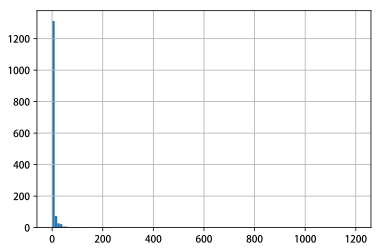

In [87]:
df['h_value_now'].hist(bins=120, range=(0,1200))

In [160]:
df2 = df[(df['h_value_now'] >= 10) & (df['h_value%_now'] >= 2)]

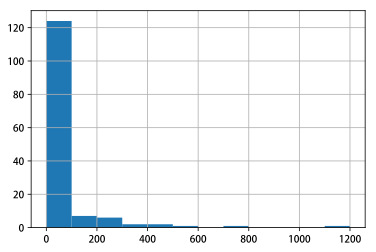

In [115]:
df2['h_value_now'].hist(bins=12, range=(0,1200))

In [139]:
df2[df2['h_value%_change'] <= 0].shape

(12, 13)

In [151]:
df2.shape

(262, 13)

In [135]:
df2[df2['h_value%_change'] <= -2]['profit%'].mean()

33.43

In [128]:
df2[(df2['h_value_now'] > 0) & (df2['h_value%_change'] > 5)]['profit%'].mean()

67.45714285714287

In [104]:
df2[(df2['total_value_now'] > 1000) & (df2['h_value%_change'] > 2)]

,market,code,company,industry,h_value_now,total_value_now,h_value,total_value,profit%,dividend%,h_value%_now,h_value%,h_value%_change
3,sz,000651,格力电器,家用电器,414.25,3545.07,175.10,2147.01,68.38,3.65,11.69,8.16,3.53
10,sh,600585,海螺水泥,建筑材料,211.18,2237.90,107.15,1551.64,47.94,4.07,9.44,6.91,2.53
14,sz,000001,平安银行,银行,171.20,2481.22,39.73,1610.58,53.47,1.02,6.90,2.47,4.43
15,sh,600690,海尔智家,家用电器,119.93,1008.13,69.21,882.03,14.65,2.26,11.90,7.85,4.05
19,sh,600031,三一重工,专用设备,102.50,1220.36,41.06,650.58,75.07,1.82,8.40,6.31,2.09
22,sz,300015,爱尔眼科,医疗保健提供商与服务,80.08,1058.52,31.78,626.83,67.44,0.46,7.57,5.07,2.50
25,sh,601012,隆基股份,半导体,61.20,1021.92,15.17,486.71,91.13,0.36,5.99,3.12,2.87
40,sh,603259,药明康德,生物科技,39.91,1326.32,0.41,871.93,51.75,0.52,3.01,0.05,2.96


In [103]:
df2[(df2['total_value_now'] > 1000) & (df2['h_value%_change'] > 2)]['profit%'].median()

60.455

In [96]:
df2['profit%'].median()

36.93

In [95]:
df2['dividend%'].median()

1.295

In [161]:
df2.to_csv('cleaned_h_to_a.csv')